# Fire up libraries

In [1]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

# Load some house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [2]:
sales = pd.read_csv('home_data.csv')

In [ ]:
sales.head()

In [15]:
sales[sales['id']==1839920160]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11860,1839920160,20140714T000000,432000,3,2.0,1870,7080,1.0,0,0,...,7,1210,660,1969,0,98034,47.7244,-122.179,1620,8000


In [ ]:
sales.keys()

In [ ]:
sales.shape

# Exploring the data for housing sales 

The house price is correlated with the number of square feet of living space.

In [ ]:
plt.grid('on')
plt.scatter(sales['sqft_living'], sales['price'])
plt.show()

# Create a simple regression model of sqft_living to price

Split data into training and testing.  
We use random_state=200 so that everyone running this notebook gets the same results.  In practice, you may set a random seed.  

In [5]:
train_data = sales.sample(frac=0.8, random_state=200)
test_data  = sales.drop(train_data.index)
print(train_data.shape, test_data.shape)

(17290, 21) (4323, 21)


In [ ]:
train_data.head()

In [ ]:
test_data.head()

## Build the regression model using only sqft_living as a feature

In [6]:
x_train = train_data['sqft_living'].values.reshape(-1,1)
y_train = train_data['price'].values.reshape(-1,1)

In [7]:
simple_model = linear_model.LinearRegression()
simple_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

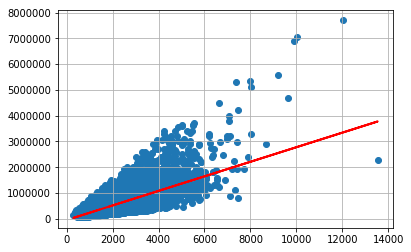

In [8]:
plt.grid('on')
plt.scatter(x_train, y_train)
plt.plot(x_train, simple_model.predict(x_train), color='red', linewidth=2)
plt.show()

# Let's show what our predictions look like

In [ ]:
x_test = test_data['sqft_living'].values.reshape(-1,1)
y_test = test_data['price'].values.reshape(-1,1)

y_pred = simple_model.predict(x_test)

In [ ]:
plt.grid('on')
plt.scatter(x_test, y_test)
plt.plot(x_test,y_pred, color='red', linewidth=2)
plt.show()

# Evaluate the simple model

In [ ]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [ ]:
print('intercept:', simple_model.intercept_, 'coefficients:', simple_model.coef_)
# The mean squared error
print("RMSE: %.2f" % (rmse(y_pred, y_test)))

RMSE of about $254.323,39

# Explore other features in the data

To build a more elaborate model, we will explore using more features.

In [ ]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [ ]:
sales[my_features].describe()

In [ ]:
#sales.show(view='BoxWhisker Plot', x='zipcode', y='price')
plt.grid('on')
plt.scatter(sales['zipcode'], sales['price'])
plt.show()

98039 is the most expensive zip code.

# Build a regression model with more features

In [ ]:
#my_features_model = (train_data,target='price',features=my_features,validation_set=None)
x_train = train_data[my_features].values.reshape(-1,len(my_features))
y_train = train_data['price'].values.reshape(-1,1)

In [ ]:
mult_model = linear_model.LinearRegression()
mult_model.fit(x_train, y_train)

## Comparing the results of the simple model with adding more features

In [ ]:
x_test = test_data[my_features].values.reshape(-1,len(my_features))
y_test = test_data['price'].values.reshape(-1,1)

y_pred = mult_model.predict(x_test)

In [ ]:
print('intercept:', mult_model.intercept_, 'coefficients:', mult_model.coef_)
# The mean squared error
print("RMSE: %.2f" % (rmse(y_pred, y_test)))

The RMSE goes down from \$254.323,39 to \$228.024,43 with more features.

# Apply learned models to predict prices of 3 houses

The first house we will use is considered an "average" house in Seattle. 

In [9]:
house1 = sales[sales['id']==5309101200]

In [10]:
#house1

x1 = house1['sqft_living'].values.reshape(-1,1)
y1 = house1['price'].values.reshape(-1,1)

y_pred = simple_model.predict(x1)

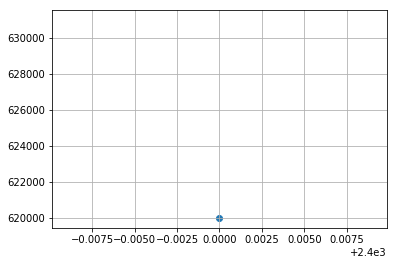

In [12]:
plt.grid('on')
plt.scatter(x1, y1)
plt.plot(x1, y_pred, color='red', linewidth=2)
plt.show()

In [17]:
house1['price']

1054    620000
Name: price, dtype: int64

In [18]:
print (simple_model.predict(house1['sqft_living']))

ValueError: Expected 2D array, got 1D array instead:
array=[2400].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
print mult_model.predict(house1[my_features])

In this case, the model with more features provides a worse prediction than the simpler model with only 1 feature.  However, on average, the model with more features is better.

## Prediction for a second, fancier house

We will now examine the predictions for a fancier house.

In [ ]:
house2 = sales[sales['id']==1925069082]

In [ ]:
house2

<img src="house2.jpg">

In [ ]:
print house2['price']

In [ ]:
print simple_model.predict(house2['sqft_living'].values.reshape(-1,1))

In [ ]:
print mult_model.predict(house2[my_features])

In this case, the model with more features provides a better prediction.  This behavior is expected here, because this house is more differentiated by features that go beyond its square feet of living space, especially the fact that it's a waterfront house. 

## Last house, super fancy

Our last house is a very large one owned by a famous Seattleite.

In [ ]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="house_bill.jpg">

In [ ]:
print simple_model.predict(pd.DataFrame(bill_gates)['sqft_living'].values.reshape(-1,1))

The model predicts a price of over $14M for this house! But we expect the house to cost much more.  (There are very few samples in the dataset of houses that are this fancy, so we don't expect the model to capture a perfect prediction here.)

In [ ]:
print mult_model.predict(pd.DataFrame(bill_gates)[my_features])

# Answers


# 1 - Selection and summary statistics

# 2 - Filtering data

# 3 - Building a regression model with several more features